## Authors

Group 5:

Joshua Au-Yeung, Metodi Baniski, Dawood Cheema, Dmitry Esaulov, Alkarim Assar    


## Project Description

Use a dataset provided by a telecom with user information and predict which customers are more likely to churn.

### Dataset

https://www.kaggle.com/code/owm4096/customer-churn-eda-prediction-w-ann-segmentation

### Column Reference

- `CustomerID`: Unique identifier for each customer.
- `CLTV`: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
- `Churn Label`: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
- `Churn Reason`: A customer’s specific reason for leaving the company.
- `Churn Score`: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
- `Churn Value`: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label. <- Target
- `City`: The city of the customer’s primary residence.
- `Contract`: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- `Count`: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- `Country`: The country of the customer’s primary residence.
- `Dependents`: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- `Device Protection`: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- `Gender`: The customer’s gender: Male, Female
- `Internet Service`: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- `Lat Long`: The combined latitude and longitude of the customer’s primary residence.
- `Latitude`: The latitude of the customer’s primary residence.
- `Longitude`: The longitude of the customer’s primary residence.
- `Monthly Charges`: The amount the customer is billed monthly.
- `Multiple Lines`: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- `Online Backup`: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- `Online Security`: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- `Paperless Billing`: Indicates if the customer has chosen paperless billing: Yes, No
- `Partner`
- `Payment Method`: How the customer makes payments (e.g., Bank transfer, Credit card).
- `Phone Service`: Indicates if the customer subscribes to home phone service with the company: Yes, No
- `Senior Citizen`: Indicates if the customer is 65 or older: Yes, No
- `State`: The state of the customer’s primary residence.
- `Streaming Movies`: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- `Streaming TV`: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- `Tech Support`: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- `Tenure Months`: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- `Total Charges`: Cumulative amount billed to the customer.
- `Zip Code`: The zip code of the customer’s primary residence.

### Objectives
- Understand why customers are leaving and build strategies to reduce churn.
- Build a classification model that predicts customer churn based on the data given.

## 1. Common imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import random
import time

from io import BytesIO

# For reproducibility
np.random.seed(42)

# Visualization settings
plt.style.use('default')  # Using default style instead of seaborn
sns.set_theme()  # This will apply seaborn styling
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Get the Data

In [ ]:
# Direct download link to the Telco Customer Churn File (Which has a local copy saved on Joshua's google drive)
url = 'https://docs.google.com/spreadsheets/d/1yrzpAkJ81hzO6q3sP7UVGWMnN6ZmMH6o/export?format=xlsx'

# Fetch the file from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Load the content into a BytesIO object
    excel_data = BytesIO(response.content)

    # Read the Excel file into a DataFrame
    df = pd.read_excel(excel_data)

    print("Column names:", df.columns.tolist())
else:
    print(f"Failed to fetch the file. Status code: {response.status_code}")


Column names: ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


## 3. Data Exploration / Visualization

In [ ]:
## Create a copy for exploration
explore_df = df.copy()

#### 3.1. Basic Exploration

In [ ]:
explore_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
explore_df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (7043, 33)

Columns: ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']

Data Types:
 CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        ob

In [ ]:
explore_df.Country.value_counts()

Country
United States    7043
Name: count, dtype: int64

In [ ]:
explore_df.State.value_counts()

State
California    7043
Name: count, dtype: int64

**Observations:**

- Lat and Long are redundant as they're the same values as Latitude and Longitude
- Country and State are matched 1:1 and identical across the entire data set, so they provide no additional value

#### 3.2. Univariate Analysis

In [ ]:

# Drop unneeded columns based on observations from the basic exploration
explore_df.drop(['Count', 'Country', 'State', 'Lat Long'], inplace=True, axis=1)
# MB: I'm not sure we should drop Zip Code. State and Country make sense, but there may be value in keeping Zip Code if certain Zip Codes churn more. TBD.

# Clean and transform column Total Charges
# explore_df['Total Charges']= df['Total Charges'].apply(lambda x: x if x!=' ' else 0)
# MB: There are no missing values in Total Charges, so this is not needed

##### 3.2.1. Top 10 Cities

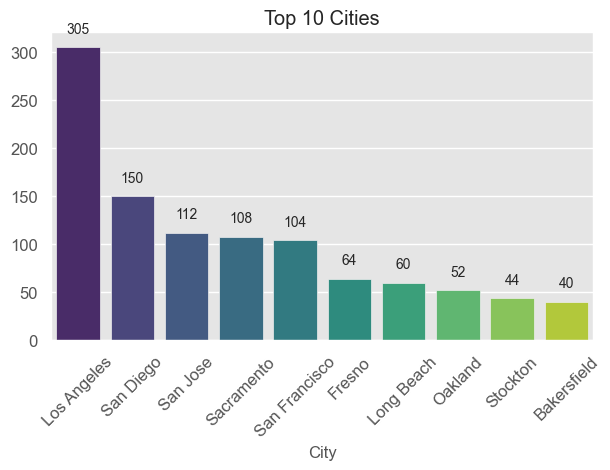

In [ ]:
top_10_Cities = explore_df.City.value_counts().head(10)

plt.figure(figsize=(7,4))
plt.style.use('ggplot')
sns.barplot(x=top_10_Cities.index, y=top_10_Cities.values, palette='viridis')
plt.title('Top 10 Cities')
plt.xlabel('City')
for i, count in enumerate(top_10_Cities.values):
    plt.text(i, count + 15, str(count), ha='center')
plt.xticks(rotation=45)
plt.show()

###### Observations:
* Majority of the customers are from Los Angeles

##### 3.2.2. Customer LifeTime Value (CLTV)

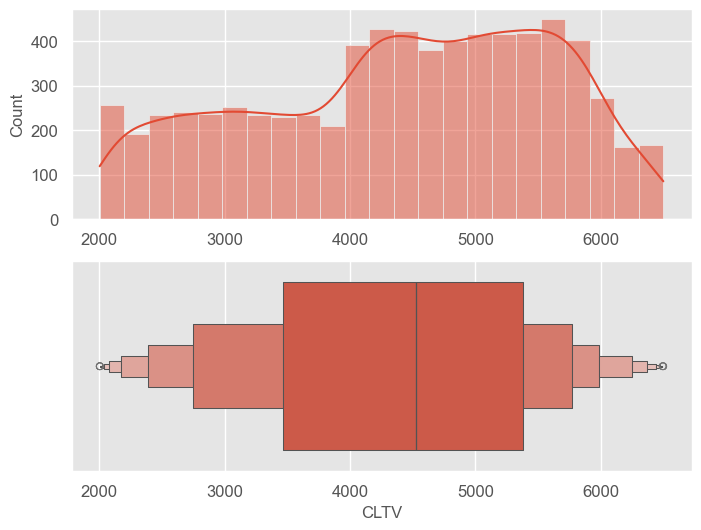

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
sns.histplot(explore_df, x='CLTV', kde=True)
plt.xlabel(None)
plt.subplot(2, 1, 2)
sns.boxenplot(explore_df, x='CLTV')
plt.show()

###### Observations:

- shape is slightly right-skewed with most customers having CLTV values between $4,000 and $6,000.
- kernel density estimate (KDE) curve smoothens the distribution and confirms the concentration around the middle range (around $4,000–$5,000).
- boxplot indicates the interquartile range (IQR) is approximately between $3,500 and $5,500, representing the middle 50% of customers.
- median (central line in the box) is around $4,500.
  
- Outliers are visible on both the lower side (below $2,500) and the higher side (above $6,000). They represent a small number of customers who either generate unusually low or high CLVT value.
- Customer Segmentation: The distribution suggests that customers can be segmented into groups based on CLTV. Those with higher CLTV might be more valuable and require targeted retention strategies.


##### 3.2.3. Churn Value Analysis
1 = churned, 0 = not churned

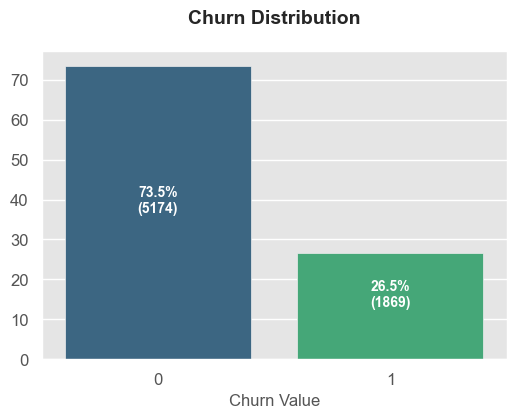

Class Distribution:
Churn Value
0    73.46%
1    26.54%
Name: proportion, dtype: object

Imbalance ratio (non-churned:churned) = 2.77:1


In [ ]:
# Calculate the percentage
total = explore_df['Churn Value'].value_counts().sum()
percentages = explore_df['Churn Value'].value_counts() / total * 100

plt.figure(figsize=(6, 4))
plt.style.use('ggplot')
sns.barplot(x=percentages.index, y=percentages.values, palette='viridis')
plt.title('Churn Distribution', fontsize=14, weight='bold', pad=20)
# Display the percentage and count in the center of each bar
for i, (percentage, count) in enumerate(zip(percentages.values, explore_df['Churn Value'].value_counts().values)):
    plt.text(i, percentage / 2, f'{percentage:.1f}%\n({count})', ha='center', color='white', weight='bold')
plt.show()

churn_distribution = df['Churn Value'].value_counts(normalize=True)
print("Class Distribution:")
print(churn_distribution.multiply(100).round(2).astype(str) + '%')

# Calculate imbalance ratio
imbalance_ratio = churn_distribution[0] / churn_distribution[1]
print(f"\nImbalance ratio (non-churned:churned) = {imbalance_ratio:.2f}:1")


###### Observations:
* With a 2.77:1 imbalance ratio, the classes are well balanced and there's no need for special handling.
* Still need to use stratification when sampling the data and use appropriate evaluation metrics beyond accuracy.

##### 3.2.4. Churn Score

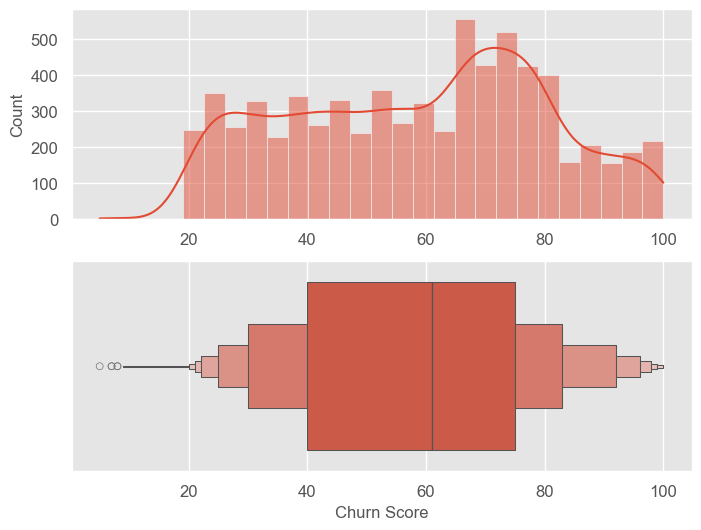

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
sns.histplot(explore_df, x='Churn Score', kde=True)
plt.xlabel(None)
plt.subplot(2, 1, 2)
sns.boxenplot(explore_df, x='Churn Score')
plt.show()

Churn score seems highly correlated with churn value. Let's check.

Correlation between Churn Score and actual churn: 0.665



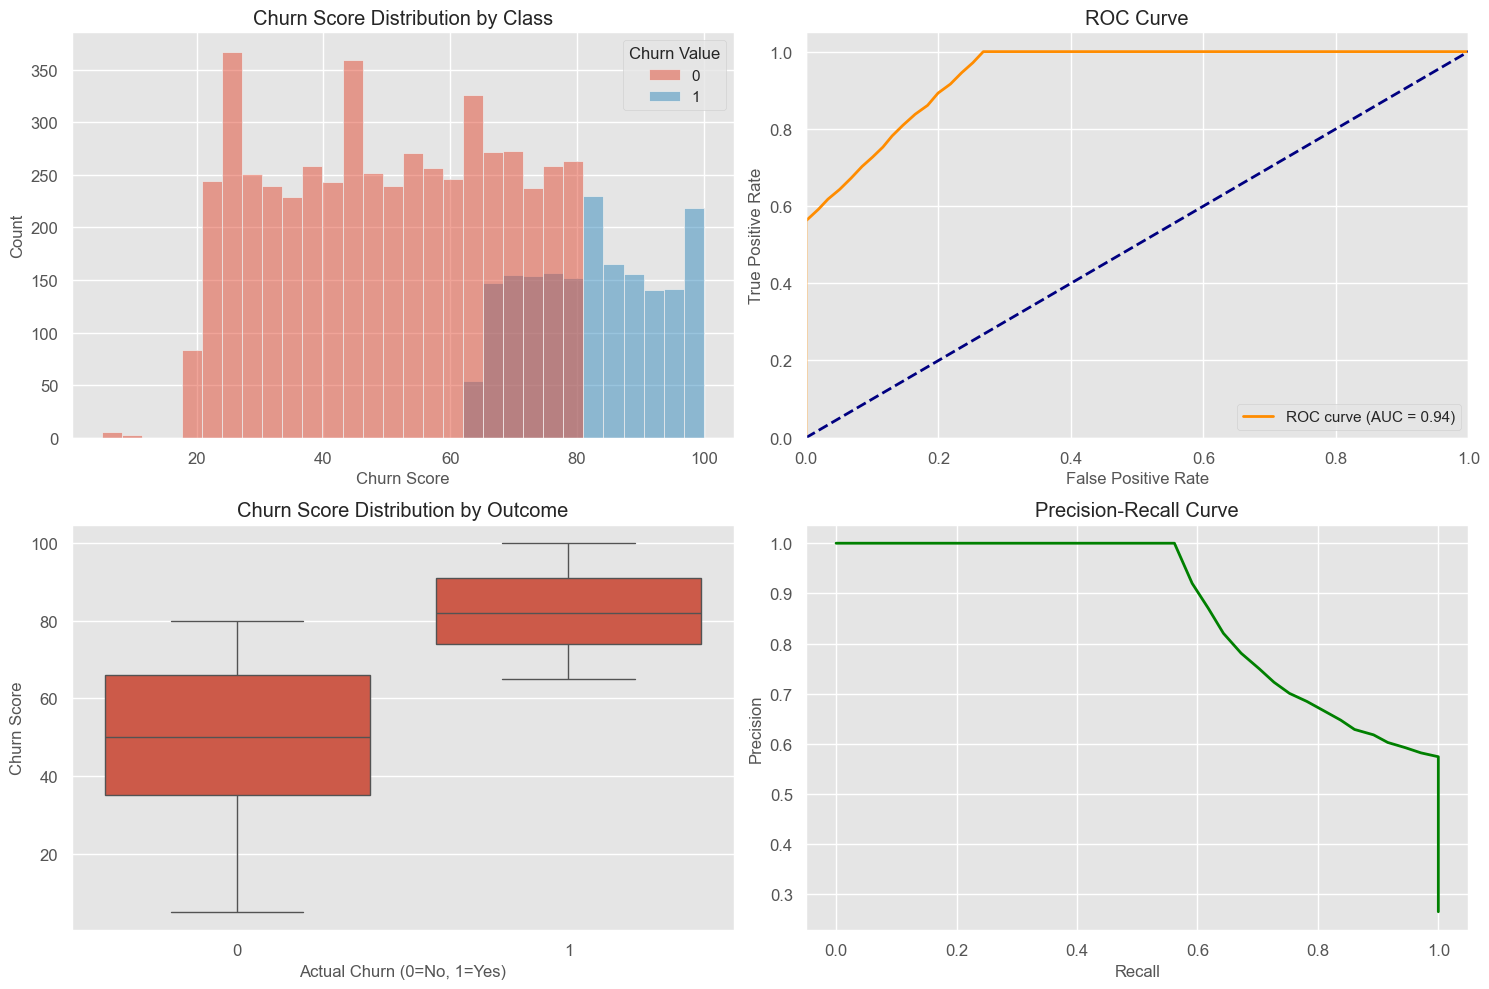


Classification Report using optimal threshold:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      5174
           1       0.67      0.81      0.73      1869

    accuracy                           0.84      7043
   macro avg       0.80      0.83      0.81      7043
weighted avg       0.86      0.84      0.85      7043


Optimal threshold: 72.000


In [ ]:
# Imports

from sklearn.metrics import (
    roc_curve,
    auc,
    precision_recall_curve,
    classification_report
)

fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Correlation Analysis
correlation = df['Churn Score'].corr(df['Churn Value'])
print(f"Correlation between Churn Score and actual churn: {correlation:.3f}\n")

# 2. Churn Score Distribution by Class
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Churn Score', hue='Churn Value', bins=30)
plt.title('Churn Score Distribution by Class')
plt.xlabel('Churn Score')
plt.ylabel('Count')

# 3. ROC Curve
plt.subplot(2, 2, 2)
fpr, tpr, thresholds = roc_curve(df['Churn Value'], df['Churn Score'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# 4. Box Plot
plt.subplot(2, 2, 3)
sns.boxplot(x='Churn Value', y='Churn Score', data=df)
plt.title('Churn Score Distribution by Outcome')
plt.xlabel('Actual Churn (0=No, 1=Yes)')
plt.ylabel('Churn Score')

# 5. Precision-Recall Curve
plt.subplot(2, 2, 4)
precisions, recalls, thresholds = precision_recall_curve(df['Churn Value'], df['Churn Score'])
plt.plot(recalls, precisions, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

# Calculate optimal threshold and metrics
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])
optimal_threshold = thresholds[f1_scores.argmax()]

# Apply optimal threshold and calculate classification metrics
y_pred = (df['Churn Score'] >= optimal_threshold).astype(int)

print("\nClassification Report using optimal threshold:")
print(classification_report(df['Churn Value'], y_pred))
print(f"\nOptimal threshold: {optimal_threshold:.3f}")

###### Observations:
- Churn Score is an excellent predictor of actual churn
    - 0.665 correlation, AUC 0.94 suggests the telecom has a strong scoring system that predicts churn, and we should aim to beat that.
- significant proportion of customers with moderate churn risk.
- around 65–80, represent customers with higher churn risk.
- fewer customers with low (below 20) or high (close to 100) churn scores.
- The kernel density estimate (KDE) curve is fairly evenly distributed between 25 and 65, indicating a wide range of churn risk among customers.   
- boxplot indicates the interquartile range (IQR) is roughly between 40 and 75, representing the middle 50% of customers.
- median churn score is around 60, suggesting a moderate overall churn risk.
- few outliers exist on the lower side (below 20), representing customers with low churn risk.

- The cluster of customers with churn scores between 70 and 80 is a high-risk group that should be prioritized for retention strategies.
- Customers with scores below 40 represent loyal customers with a lower churn risk, which is a positive sign.

##### 3.2.5. Churn Reason

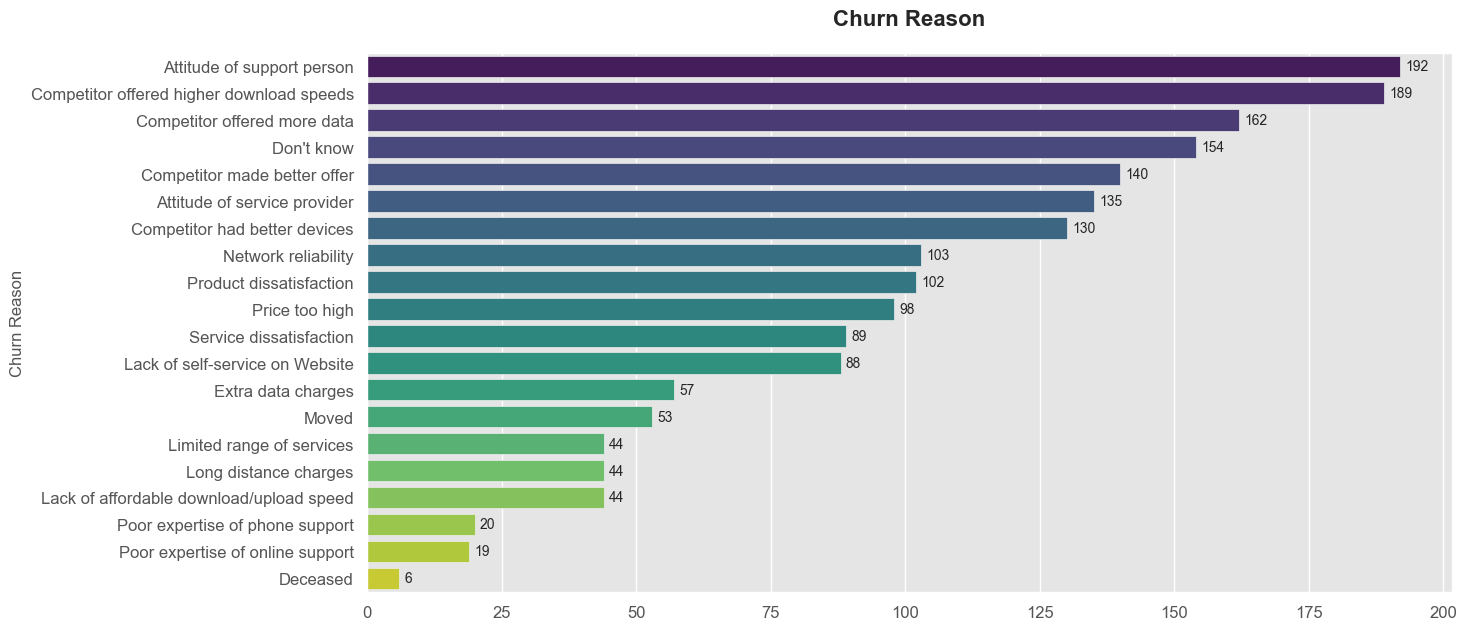

In [ ]:
plt.figure(figsize=(14,7))
plt.style.use('ggplot')
sns.barplot(y=explore_df['Churn Reason'].value_counts().index, x=explore_df['Churn Reason'].value_counts().values, palette='viridis')
plt.title('Churn Reason', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(explore_df['Churn Reason'].value_counts().values):
    plt.text(count + 1, i, str(count), va='center')
plt.show()

###### Observations:
* Key reasons for churn are *Poor customer service* and *Competitors offering better features, price and product*

##### 3.2.6. Payment Method

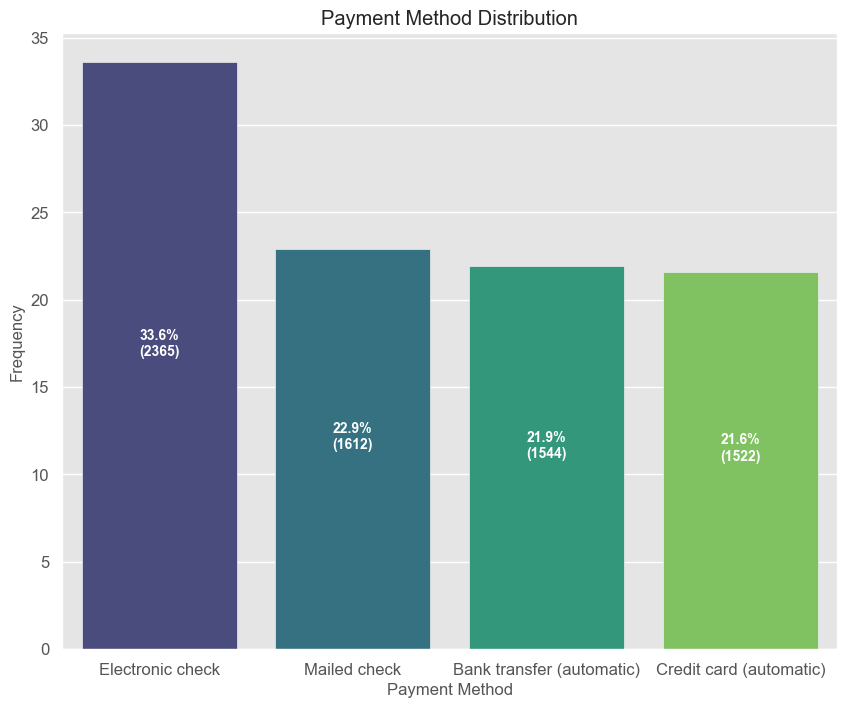

In [ ]:
# Calculate the percentage
total = explore_df['Payment Method'].value_counts().sum()
percentages = explore_df['Payment Method'].value_counts() / total * 100

plt.figure(figsize=[10,8])
plt.style.use('ggplot')
sns.barplot(x=percentages.index, y=percentages.values, palette='viridis')
plt.title('Payment Method', fontsize=14, weight='bold', pad=20)
# Display the percentage and count in the center of each bar
for i, (percentage, count) in enumerate(zip(percentages.values, explore_df['Payment Method'].value_counts().values)):
    plt.text(i, percentage / 2, f'{percentage:.1f}%\n({count})', ha='center', color='white', weight='bold')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.show()

###### Observations:
* Most customers use an electronic check payment method


##### 3.2.7. Monthly Charges

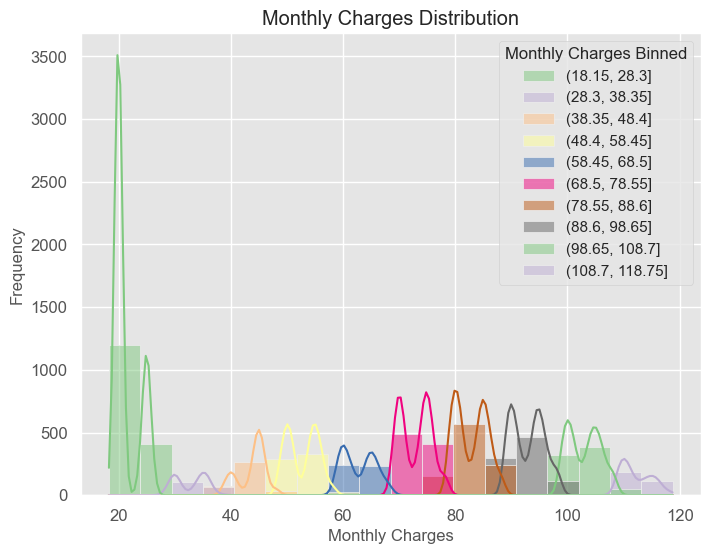

In [ ]:
plt.figure(figsize=[8,6])
df['Monthly Charges Binned'] = pd.cut(df['Monthly Charges'], bins=10)  # Create 10 bins
sns.histplot(data=df, x='Monthly Charges', kde=True, palette='Accent', hue='Monthly Charges Binned', legend=True)  # Use binned variable for hue
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

###### Observations:
* Many customers have low monthly charges of around $20-$30. The variations suggest subscription tiers, service levels, or usage rates.

##### 3.2.8. Total Charges

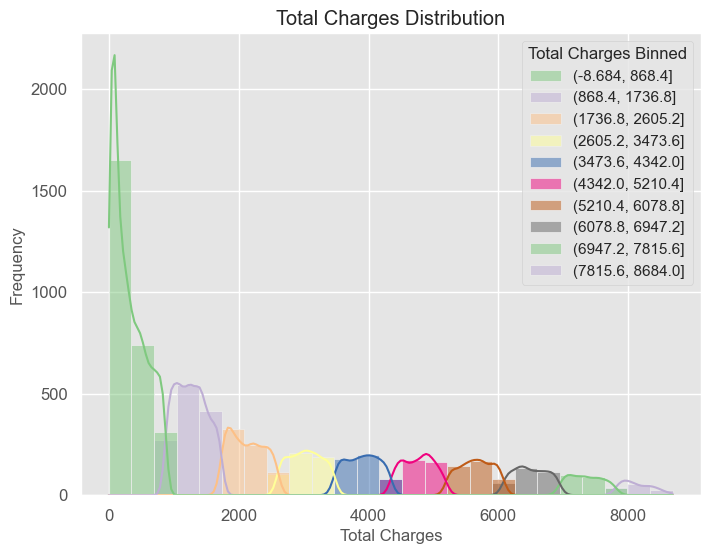

In [ ]:
df['Total Charges'] = df['Total Charges'].replace(" ", 0).astype(float)
df['Total Charges'] = df['Total Charges'].astype(int)

plt.figure(figsize=[8,6])
df['Total Charges Binned'] = pd.cut(df['Total Charges'], bins=10)  # Create 10 bins
sns.histplot(data=df, x='Total Charges', kde=True, palette='Accent', hue='Total Charges Binned')  # Use binned variable for hue
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

###### Observations:
- The distribution is right-skewed with most paying small total charge. This could be due to recent customers or short-term usage.

##### 3.2.9. Analyze the remaining fields

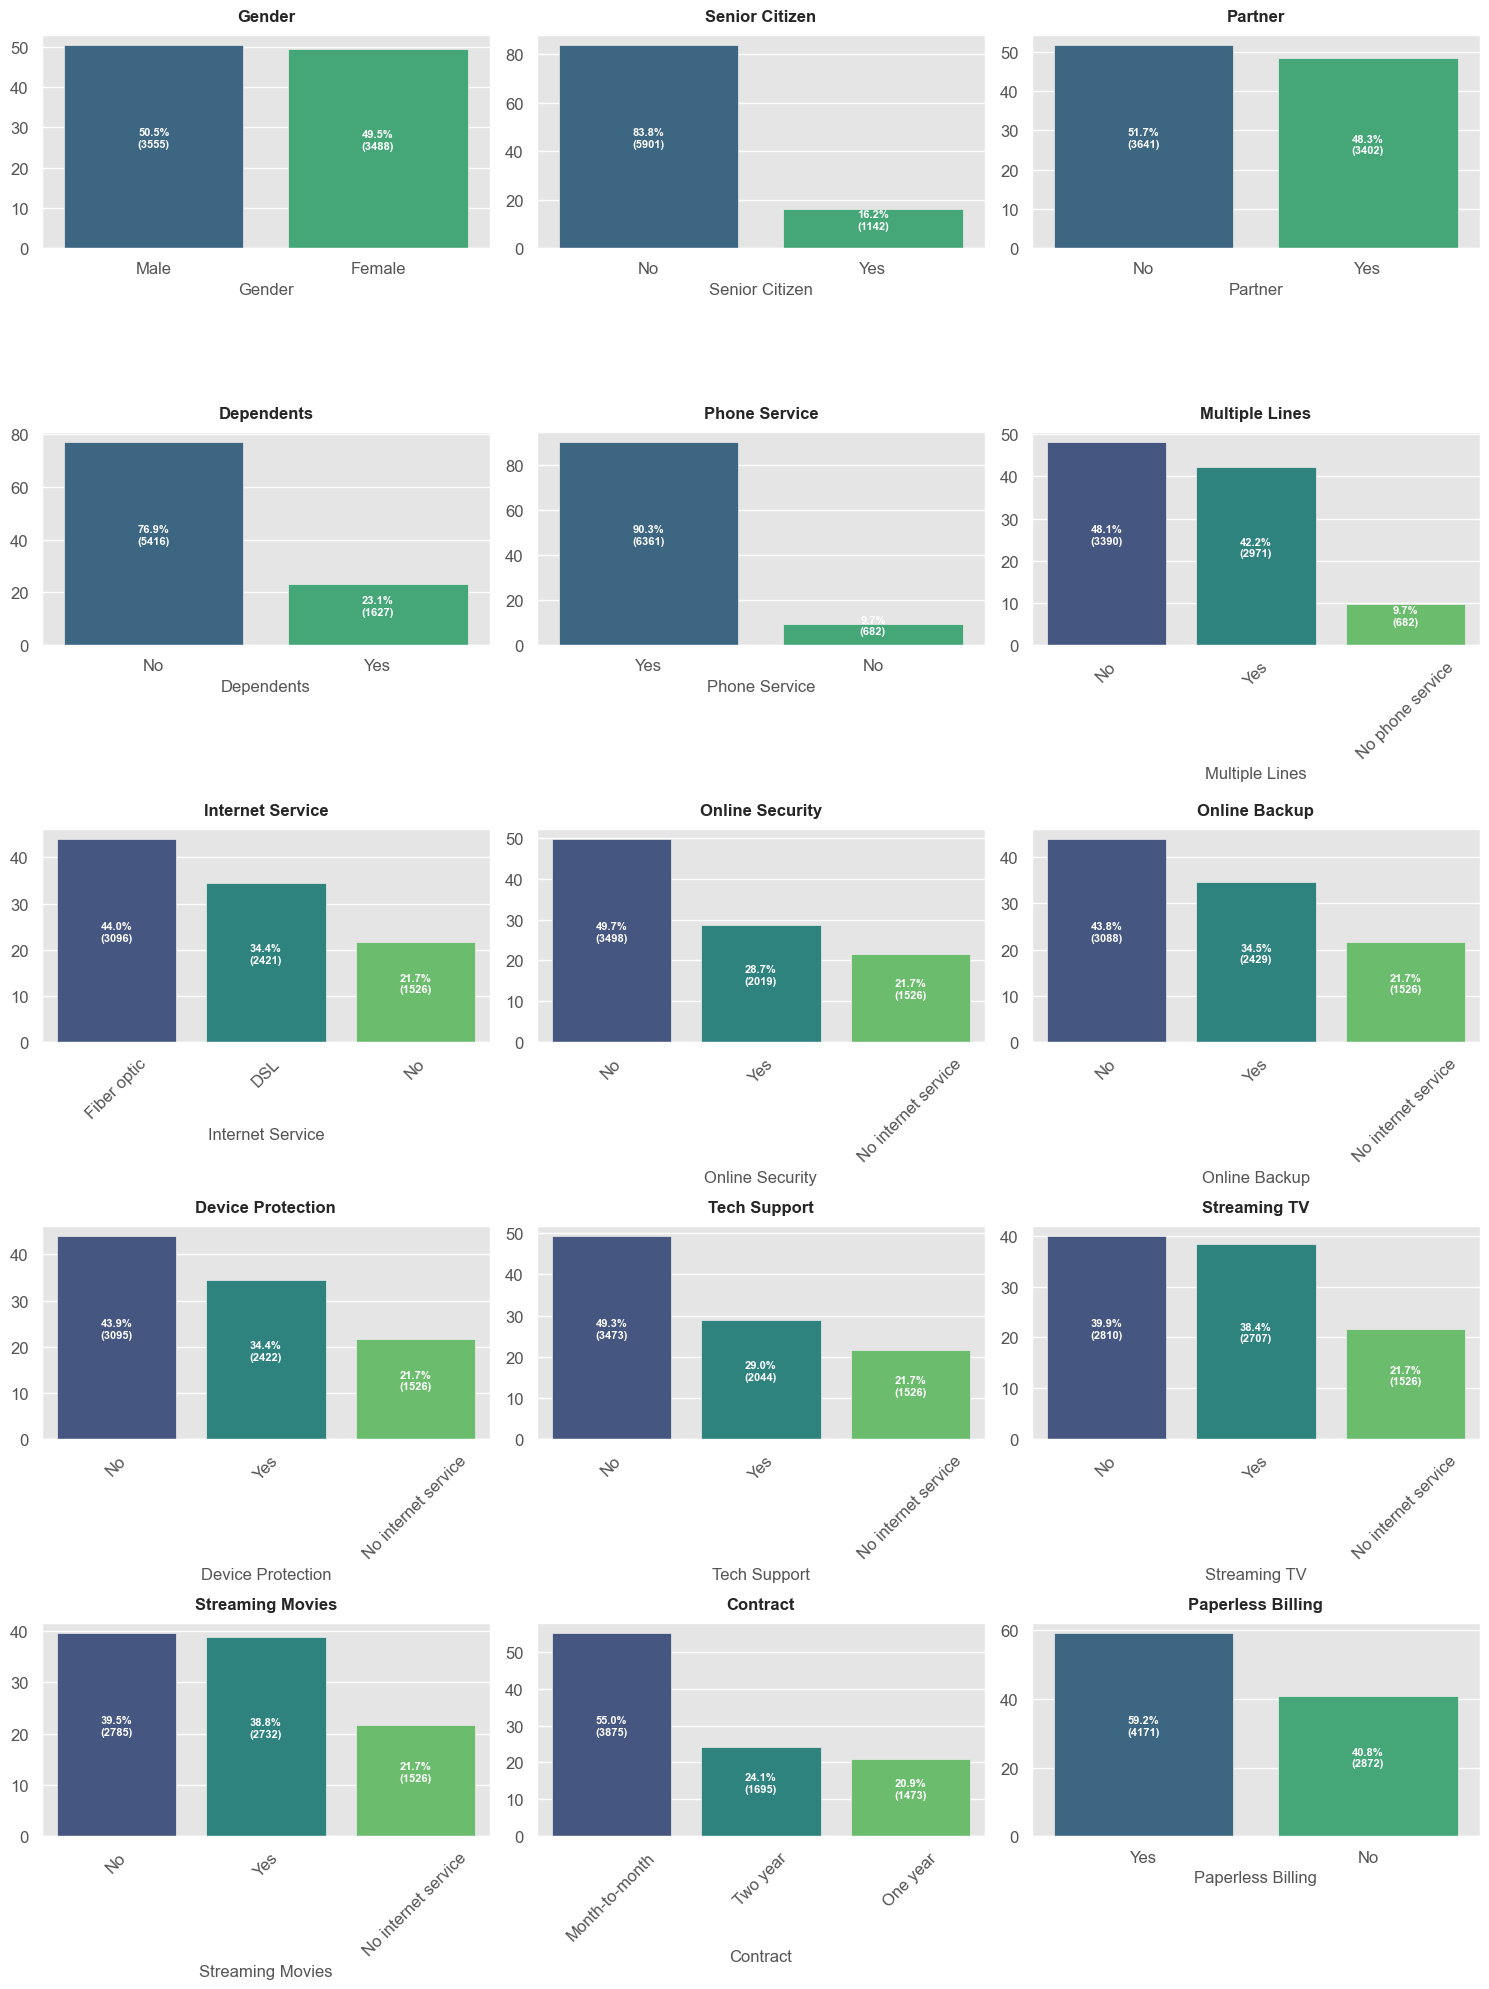

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# List of categorical columns to plot
categorical_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                      'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
                      'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing']

# Calculate grid dimensions
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
plt.style.use('ggplot')

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each categorical column and create a bar plot
for idx, (col, ax) in enumerate(zip(categorical_columns, axes)):
    total = explore_df[col].value_counts().sum()
    percentages = explore_df[col].value_counts() / total * 100

    sns.barplot(x=percentages.index, y=percentages.values, palette='viridis', ax=ax)
    ax.set_title(col, fontsize=12, weight='bold', pad=10)

    # Display the percentage and count in the center of each bar
    for i, (percentage, count) in enumerate(zip(percentages.values, explore_df[col].value_counts().values)):
        ax.text(i, percentage/2, f'{percentage:.1f}%\n({count})',
                ha='center', color='white', weight='bold', fontsize=8)

    # Rotate x-labels if they're too long
    if max(len(str(label)) for label in percentages.index) > 10:
        ax.tick_params(axis='x', rotation=45)

# Remove any empty subplots
for idx in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

###### Observations:
- Gender: almost equal distribution of males than females
- Senior Citizen: less senior customs
- Partner: slightly more single than partners
- Dependents: more customers do not have dependants
- Phone Service: most customers have a phone service
- Multiple Lines: most customers do not have multiple lines for their phone service
- Internet Service: most customers use fibre optic
- Online Security: most customers do not have online security
- Online Backup: most customers do not have an online backup
- Device Protection: most customers do not have device protection
- Tech Support: most customers do not have tech support
- Streaming TV: most customers do not stream TV
- Streaming Movies: most customers do not stream movies (similar to Streaming TV)
- Contract: most customers have a month-to-month contract
- Paperless Billing: most customers have a paperless billing

##### 3.2.10. Correlation between attributes

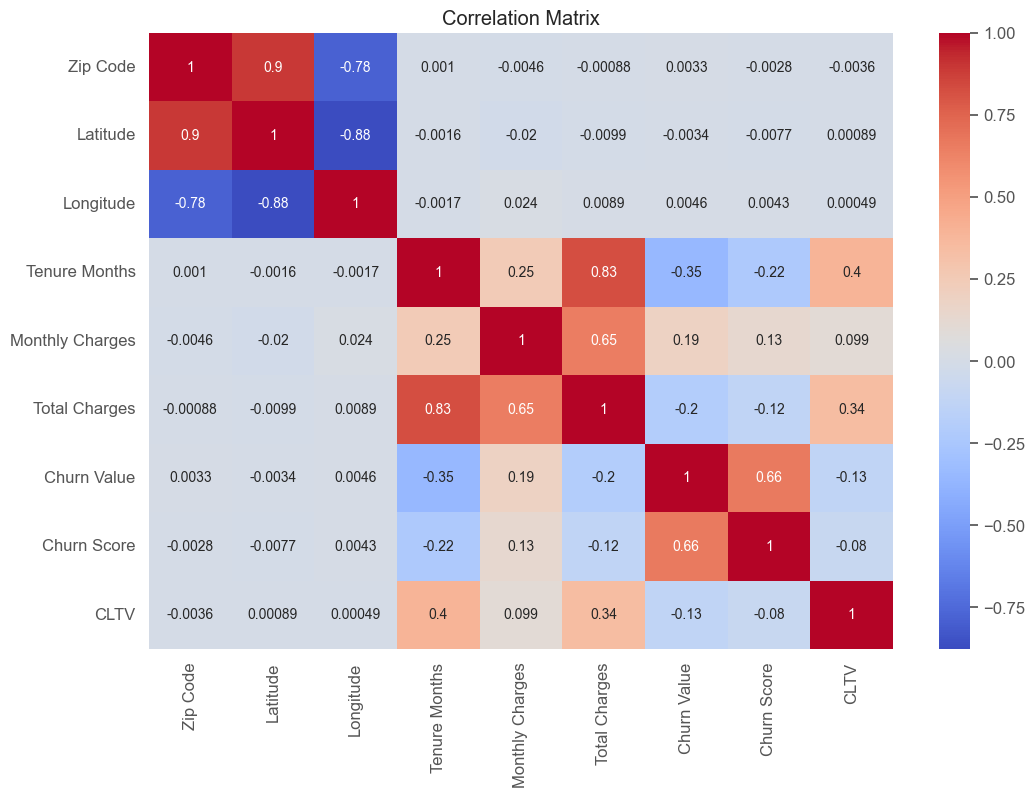

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Total Charges' to numeric, forcing errors to NaN
explore_df['Total Charges'] = pd.to_numeric(explore_df['Total Charges'], errors='coerce')

# Drop non-numeric columns
numeric_df = explore_df.select_dtypes(include=['float64', 'int64'])

# Fill NaN values with 0 (or you can use other imputation methods)
numeric_df = numeric_df.fillna(0)

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###### Observations:
- Latitude and Longitude: high negative correlation (-0.88) - when one increases, the other tends to decrease.
- Tenure Months and Total Charges: high positive correlation (0.83) - customers who stay longer tend to have higher total charges.
- Churn Value and Churn Score: moderate positive correlation (0.66) - indicates higher churn scores are associated with higher churn values.
- Churn Value and Tenure Months: A moderate negative correlation (-0.35) suggests that customers who stay longer are less likely to churn.

In [ ]:
# Ensure source data is intact
source_df = df.copy()

**Clean data**

#### 3.3 Strategy based on analysis ###

1. Create a model using only the Churn Score as a benchmark.
2. Train a variety of models using the cleaned and scaled data
3. Select a few candidates and fine tune.
4. Pick a final model

## 4. Training Models

#### 4.1. Baseline Model

In [ ]:
# Establish a baseline model using only the Churn Score.

# Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = df[['Churn Score']]  # Using only Churn Score as predictor
y = df['Churn Value']    # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 80-20 split
    random_state=42,
    stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple logistic regression as baseline
from sklearn.linear_model import LogisticRegression
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = baseline_model.predict(X_test_scaled)
y_pred_proba = baseline_model.predict_proba(X_test_scaled)[:, 1]

# Print evaluation metrics
print("Baseline Model Performance (using only Churn Score):")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix (ugly):")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Baseline Model Performance (using only Churn Score):

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1035
           1       0.77      0.71      0.74       374

    accuracy                           0.87      1409
   macro avg       0.83      0.82      0.82      1409
weighted avg       0.86      0.87      0.86      1409


Confusion Matrix (ugly):
[[954  81]
 [108 266]]

ROC AUC Score: 0.9433620088351546


##### Baseline Model Conclusion

1. Overall performance:
    - Accuracy: 87%
    - ROC AUC: 0.94 (matches the original Churn Score's performance)

2. Class-specific performance:
    - Non-churners:
      - Precision: 90% - When model predicts non-churn, it's right 90% of the time
      - Recall: 92% - Model correctly identifies 92% of actual non-churners
      - F1-score: 91%
    - Churners:
      - Precision: 77% - When model predicts churn, it's right 77% of the time
      - Recall: 71% - Model correctly identifies 71% of actual churners
      - F1-score: 74%

3. Confusion Matrix:
    - True Negatives (954): Correctly predicted non-churn
    - False Positives (81): Incorrectly predicted churn
    - False Negatives (108): Missed actual churners
    - True Positives (266): Correctly predicted churn



#### 4.2. Training other models


In [ ]:
# Imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
#---------------
# Prepare the data

df = source_df

X = df.drop(columns=['Churn Value', 'CustomerID', 'Churn Score', 'Total Charges', 'Churn Reason'])
y = df['Churn Value']    # Target

# Handling missing values with SimpleImputer  # Most frequent strategy for categorical columns
imputer = SimpleImputer(strategy='most_frequent')

# Categorical encoding: Label Encoding for binary categories, One-Hot Encoding for multi-class
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_columns)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 80-20 split
    random_state=42,
    stratify=y
)

# Define models with their specific requirements
models = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42)
    },
    'RandomForest': {
        'model': RandomForestClassifier(n_estimators=100, random_state=42)
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(random_state=42, verbose=-1)
    },
    'SVC': {
        'model': SVC(random_state=42, probability=True)
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42)
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42)
    },
    'KNN': {
        'model': KNeighborsClassifier(n_neighbors=5)
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42)
    }
}

results = []

for name, model_info in models.items():
    print(f"\nTraining {name}...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model_info['model'])
    ])

    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'CV ROC-AUC Mean': cv_scores.mean(),
        'CV ROC-AUC Std': cv_scores.std(),
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Test ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'Precision': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'],
        'Recall': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall'],
        'F1-Score': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('CV ROC-AUC Mean', ascending=False)

print("\nModel Performance Comparison:")
print(results_df.round(4))


Training LogisticRegression...

Training RandomForest...

Training XGBoost...

Training LightGBM...

Training SVC...

Training AdaBoost...

Training GradientBoosting...

Training KNN...

Training DecisionTree...

Model Performance Comparison:
                Model  CV ROC-AUC Mean  CV ROC-AUC Std  Test Accuracy  \
6    GradientBoosting           0.8603          0.0142         0.7913   
0  LogisticRegression           0.8568          0.0127         0.7977   
3            LightGBM           0.8536          0.0126         0.7892   
5            AdaBoost           0.8523          0.0159         0.8013   
1        RandomForest           0.8495          0.0096         0.7935   
2             XGBoost           0.8391          0.0123         0.7630   
4                 SVC           0.8369          0.0128         0.7977   
7                 KNN           0.7933          0.0125         0.7615   
8        DecisionTree           0.6673          0.0118         0.7374   

   Test ROC-AUC  Precisio

##### Other Models Conclusion

The top 3 performers (by CV ROC-AUC Mean):
1. GradientBoosting (0.8603)
    - Strong performance across all metrics, suggesting effective handling of complex patterns in the data
    - High ROC-AUC suggests it balances sensitivity and specificity well
2. Logistic Regression (0.8568)
    - Super simple, yet effective.
    - High F1-Score suggests it balances precision and recall well
3. LightGBM (0.8536)
    - Shows decent accuracy and ROC-AUC

Based on this, will do some fine tuning on:
1. *GradientBoosting*, *LightGBM* (show potential with high ROC-AUC and balanced metrics)
2. AdaBoost (high accuracy, will need to watch for overfitting)
3. LogisticRegression (it's just so simple and it works... must give it a chance, even though tuning likely won't change much)

#### 4.3. Fine Tuning


Tuning LogisticRegression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'classifier__C': 10, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best cross-validation score: 0.8569

Tuning GradientBoosting...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Best cross-validation score: 0.8637

Tuning LightGBM...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 300, 'classifier__num_leaves': 31, 'classifier__subsample': 0.8}
Best cross-validation score: 0.8622

Tuning AdaBoost...
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/metodibaniski/Documents/SCS3253/.3-110-venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/metodibaniski/Documents/SCS3253/.3-110-venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/metodibaniski/Documents/SCS3253/.3-110-venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/metodibaniski/Documents/SCS3253/.3-110-venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

Best parameters: {'classifier__algorithm': 'SAMME.R', 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Best cross-validation score: 0.8587

Tuned Model Performance Comparison:
                      Model  Test Accuracy  Test ROC-AUC  Precision  Recall  \
0  Tuned LogisticRegression         0.7977        0.8443     0.7912  0.7977   
1    Tuned GradientBoosting         0.7984        0.8547     0.7877  0.7984   
2            Tuned LightGBM         0.7963        0.8574     0.7845  0.7963   
3            Tuned AdaBoost         0.7999        0.8524     0.7896  0.7999   

   F1-Score  
0    0.7936  
1    0.7896  
2    0.7860  
3    0.7916  


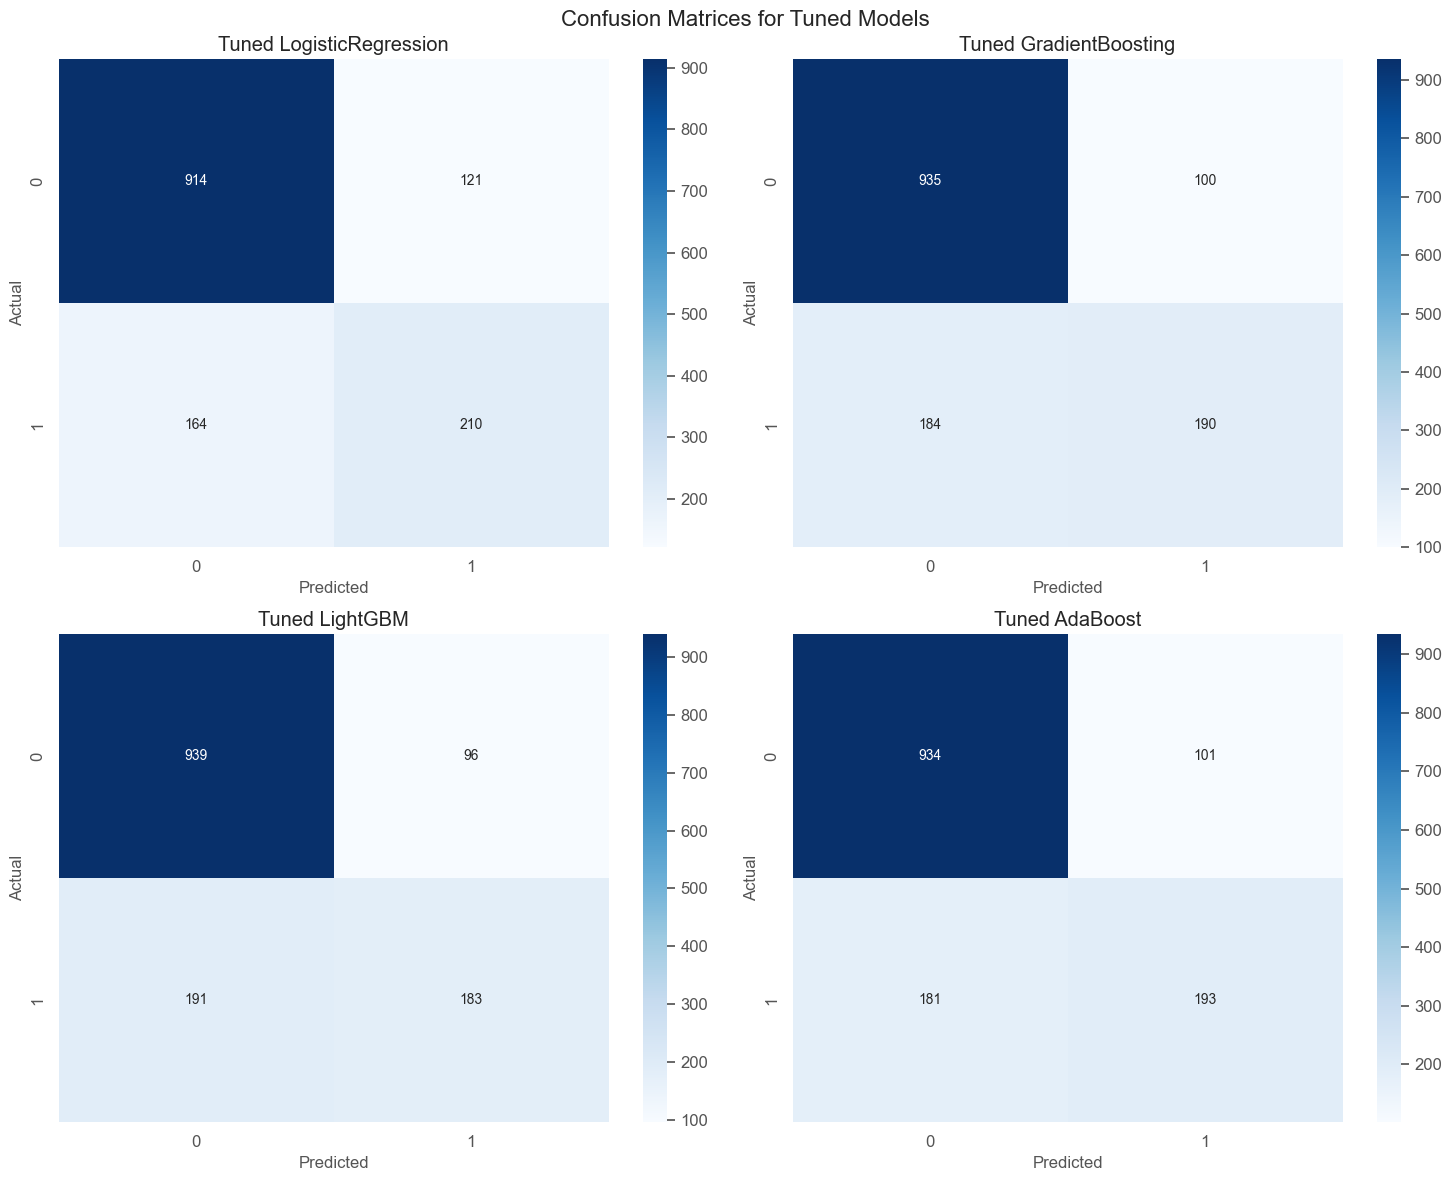


Classification Report for Tuned LogisticRegression:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1035
           1       0.63      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Classification Report for Tuned GradientBoosting:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Classification Report for Tuned LightGBM:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.49      0.56       374

    accuracy                       

In [ ]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Parameter grids
param_grids = {
    'LogisticRegression': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__max_iter': [1000]
    },

    'GradientBoosting': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 4, 5],
        'classifier__learning_rate': [0.01, 0.1, 0.3],
        'classifier__subsample': [0.8, 0.9, 1.0]
    },

    'LightGBM': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [-1, 5, 10],  # -1 = no limit
        'classifier__learning_rate': [0.01, 0.1, 0.3],
        'classifier__num_leaves': [31, 63, 127],
        'classifier__subsample': [0.8, 0.9, 1.0]
    },

    'AdaBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1.0],
        'classifier__algorithm': ['SAMME', 'SAMME.R'] # SAMME.R is getting deprecated in the future
    }
}

def tune_model(model_name, base_model, param_grid, X_train, y_train):
    print(f"\nTuning {model_name}...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', base_model)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

tuned_models = {}

for model_name, param_grid in param_grids.items():
    if model_name in models:
        tuned_models[model_name] = tune_model(
            model_name,
            models[model_name]['model'],
            param_grid,
            X_train,
            y_train
        )


tuned_results = []

for name, model in tuned_models.items():

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # results
    tuned_results.append({
        'Model': f'Tuned {name}',
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Test ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'Precision': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'],
        'Recall': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall'],
        'F1-Score': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    })

tuned_results_df = pd.DataFrame(tuned_results)
print("\nTuned Model Performance Comparison:")
print(tuned_results_df.round(4))

# confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Confusion Matrices for Tuned Models', fontsize=16)

axes = axes.flatten()

for idx, (name, grid_search) in enumerate(tuned_models.items()):
    y_pred = grid_search.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Tuned {name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification reports
for name, grid_search in tuned_models.items():
    print(f"\nClassification Report for Tuned {name}:")
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))

# Compare with baseline
print("\nImprovement over baseline:")
baseline_results = results_df[results_df['Model'].isin(param_grids.keys())]
for model in param_grids.keys():
    baseline = baseline_results[baseline_results['Model'] == model]['Test ROC-AUC'].values[0]
    tuned = tuned_results_df[tuned_results_df['Model'] == f'Tuned {model}']['Test ROC-AUC'].values[0]
    print(f"{model}: {((tuned - baseline) / baseline * 100):.2f}% improvement")

##### Fine Tuning Conclusion

- All tuned models performed very similarly, with test accuracy (0.7963-0.7999)
- *AdaBoost* achieved highest accuracy and F1-Score
- *LogisticRegression* remained highly performant despite simplicity, and as suspected, tuning didn't change much
- *LightGBM* benefited the most from tuning

#### 4.4 Single Model Recommendation

1. First choice: **AdaBoost**
    - Highest accuracy and F1-Score
    - Simple parameter set
    - Good balance of metrics
2. Second choice: **GradientBoosting**
    - More rubust to different types of data
    - Better handling of complex patterns


#### 4.5 Try ensemble methods


Training and evaluating Simple Voting classifier...

Training and evaluating Weighted Voting classifier...

Training and evaluating Stacking classifier...

Ensemble Methods Performance Comparison:
             Model  CV Accuracy Mean  CV Accuracy Std  CV ROC-AUC Mean  \
0    Simple Voting            0.8136           0.0091           0.8659   
1  Weighted Voting            0.8136           0.0091           0.8659   
2         Stacking            0.8129           0.0099           0.8658   

   CV ROC-AUC Std  CV F1 Mean  CV F1 Std  Test Accuracy  Test ROC-AUC  \
0          0.0025      0.8057     0.0112         0.8020        0.8563   
1          0.0025      0.8057     0.0112         0.8013        0.8563   
2          0.0026      0.8061     0.0118         0.8006        0.8567   

   Test Precision  Test Recall  Test F1-Score  
0          0.7923       0.8020         0.7944  
1          0.7915       0.8013         0.7936  
2          0.7921       0.8006         0.7946  

Performance Improve

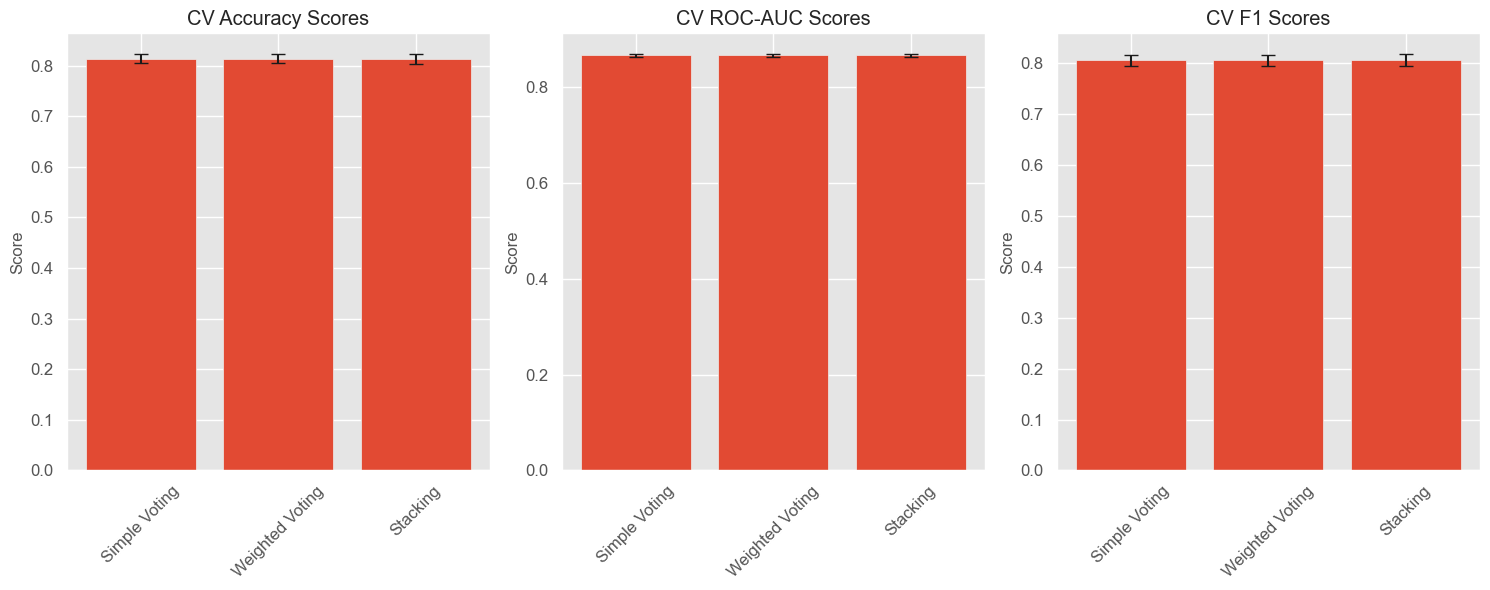

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Ensemble classifiers
voting_clf = VotingClassifier(
    estimators=[
        ('lr', tuned_models['LogisticRegression']),
        ('gb', tuned_models['GradientBoosting']),
        ('lgb', tuned_models['LightGBM']),
        ('ada', tuned_models['AdaBoost'])
    ],
    voting='soft'
)

weighted_voting_clf = VotingClassifier(
    estimators=[
        ('lr', tuned_models['LogisticRegression']),
        ('gb', tuned_models['GradientBoosting']),
        ('lgb', tuned_models['LightGBM']),
        ('ada', tuned_models['AdaBoost'])
    ],
    voting='soft',
    weights=[0.8443, 0.8547, 0.8574, 0.8524]  # ROC-AUC scores
)

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', tuned_models['LogisticRegression']),
        ('gb', tuned_models['GradientBoosting']),
        ('lgb', tuned_models['LightGBM']),
        ('ada', tuned_models['AdaBoost'])
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    stack_method='predict_proba'
)

ensemble_models = {
    'Simple Voting': voting_clf,
    'Weighted Voting': weighted_voting_clf,
    'Stacking': stacking_clf
}

ensemble_results = []

# x-val strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in ensemble_models.items():
    print(f"\nTraining and evaluating {name} classifier...")

    # x-val scores
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_roc_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    test_accuracy = accuracy_score(y_test, y_pred)
    test_roc_auc = roc_auc_score(y_test, y_pred_proba)

    report = classification_report(y_test, y_pred, output_dict=True)

    ensemble_results.append({
        'Model': name,
        'CV Accuracy Mean': cv_accuracy.mean(),
        'CV Accuracy Std': cv_accuracy.std(),
        'CV ROC-AUC Mean': cv_roc_auc.mean(),
        'CV ROC-AUC Std': cv_roc_auc.std(),
        'CV F1 Mean': cv_f1.mean(),
        'CV F1 Std': cv_f1.std(),
        'Test Accuracy': test_accuracy,
        'Test ROC-AUC': test_roc_auc,
        'Test Precision': report['weighted avg']['precision'],
        'Test Recall': report['weighted avg']['recall'],
        'Test F1-Score': report['weighted avg']['f1-score']
    })

ensemble_results_df = pd.DataFrame(ensemble_results)
print("\nEnsemble Methods Performance Comparison:")
print(ensemble_results_df.round(4))

print("\nPerformance Improvement over Best Individual Model:")
best_individual_accuracy = max(tuned_results_df['Test Accuracy'])
best_individual_roc = max(tuned_results_df['Test ROC-AUC'])
best_individual_f1 = max(tuned_results_df['F1-Score'])

for _, row in ensemble_results_df.iterrows():
    print(f"\n{row['Model']}:")
    print(f"Test Accuracy: {((row['Test Accuracy'] - best_individual_accuracy) / best_individual_accuracy * 100):.2f}%")
    print(f"Test ROC-AUC: {((row['Test ROC-AUC'] - best_individual_roc) / best_individual_roc * 100):.2f}%")
    print(f"Test F1-Score: {((row['Test F1-Score'] - best_individual_f1) / best_individual_f1 * 100):.2f}%")

plt.figure(figsize=(15, 6))
metrics = ['CV Accuracy', 'CV ROC-AUC', 'CV F1']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    data = [row[f'{metric} Mean'] for row in ensemble_results]
    errors = [row[f'{metric} Std'] for row in ensemble_results]

    x = np.arange(len(ensemble_models))
    plt.bar(x, data, yerr=errors, capsize=5)
    plt.title(f'{metric} Scores')
    plt.xticks(x, ensemble_models.keys(), rotation=45)
    plt.ylabel('Score')

plt.tight_layout()
plt.show()

##### Ensemble Methods Conclusion

- Very marginal improvements over the best individual model
- Ensemble methods are more stable than individual models
- Simple Voting does as well as more complex methods

##### Recommendation

- First choice: **Simple Voting**
    - some accuracy improvement over AdaBoost
    - Simple to implement
    - Stable performance

- Second choice: stick with AdaBoost.